In [2]:
import pandas as pd

# Use read_excel for .xlsx files
df = pd.read_excel("NewspaperChurn.xlsx")
df.head()


,SubscriptionID,HH Income,Home Ownership,Ethnicity,dummy for Children,Year Of Residence,Age range,Language,Address,State,City,County,Zip Code,weekly fee,Deliveryperiod,Nielsen Prizm,reward program,Source Channel,Subscriber
0,180590686,"$ 30,000 - $39,999",RENTER,German,N,1,25-29,German,1 3RD PL UNIT 703,CA,LONG BEACH,LOS ANGELES,90802,$7.00 - $7.99,7Day,FM,0,CircAdm,NO
1,181401653,"$500,000 Plus",OWNER,unknown,Y,14,50-54,NaN,1 AVIGNON,CA,NEWPORT COAST,ORANGE,92657,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
2,180374685,"$100,000 - $124,999",OWNER,Italian,Y,7,45-49,English,1 BLACKSWAN,CA,IRVINE,ORANGE,92604,$0.01 - $0.50,SunOnly,MW,0,Partner,YES
3,180703483,"$200,000 - $249,999",OWNER,English,N,23,55-59,English,1 BLUE HORIZON,CA,LAGUNA NIGUEL,ORANGE,92677,$1.00 - $1.99,SunOnly,MW,1,Internet,NO
4,180358906,"$ 50,000 - $59,999",OWNER,Italian,N,23,60-64,English,1 BRISA DEL LAGO,CA,RANCHO SANTA MARGARITA,ORANGE,92688,$8.00 - $8.99,Thu-Sun,MM,0,Crew,YES


In [5]:
df.info()
df.describe()
df.isnull().sum()
df.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15855 entries, 0 to 15854
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SubscriptionID      15855 non-null  int64 
 1   HH Income           15855 non-null  object
 2   Home Ownership      15855 non-null  object
 3   Ethnicity           15855 non-null  object
 4   dummy for Children  15855 non-null  object
 5   Year Of Residence   15855 non-null  int64 
 6   Age range           15747 non-null  object
 7   Language            14848 non-null  object
 8   Address             15855 non-null  object
 9   State               15855 non-null  object
 10  City                15855 non-null  object
 11  County              15855 non-null  object
 12  Zip Code            15855 non-null  int64 
 13  weekly fee          15669 non-null  object
 14  Deliveryperiod      15855 non-null  object
 15  Nielsen Prizm       15726 non-null  object
 16  reward program      15

SubscriptionID  HH Income            Home Ownership  Ethnicity              dummy for Children  Year Of Residence  Age range         Language  Address                  State  City                 County  Zip Code  weekly fee       Deliveryperiod  Nielsen Prizm  reward program  Source Channel  Subscriber
110001064       $100,000 - $124,999  OWNER           Swedish                N                   54                 75 years or more  English   11851 MELODY PARK DR     CA     GARDEN GROVE         ORANGE  92840     $10.00 - $10.99  7Day            MW             0               CustCall        NO            1
180516560       $  20,000 - $29,999  OWNER           Hispanic               Y                   15                 50-54             Spanish   1002 N LOGAN ST          CA     SANTA ANA            ORANGE  92701     $0.01 - $0.50    SunOnly         MW             0               Partner         NO            1
180519048       $  50,000 - $59,999  OWNER           English               

In [6]:
df.drop(['SubscriptionID', 'Address', 'Zip Code', 'City', 'County', 'State'], axis=1, inplace=True)


In [7]:
# Check again
df.isnull().sum()

# Drop or fill missing values
df.dropna(inplace=True)  # Simple option; can also do forward-fill or category mode


In [8]:
# Clean 'HH Income'
df['HH Income'] = df['HH Income'].str.replace('$', '').str.replace(',', '').str.replace(' ', '')
df['HH Income'] = df['HH Income'].str.extract('(\d+)').astype(float)

# Clean 'weekly fee'
df['weekly fee'] = df['weekly fee'].str.replace('$', '').str.replace(',', '').str.replace(' ', '')
df['weekly fee'] = df['weekly fee'].str.extract('(\d+)').astype(float)


<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_9644\1205463743.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['HH Income'] = df['HH Income'].str.extract('(\d+)').astype(float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9644\1205463743.py:7: SyntaxWarning: invalid escape sequence '\d'
  df['weekly fee'] = df['weekly fee'].str.extract('(\d+)').astype(float)


In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


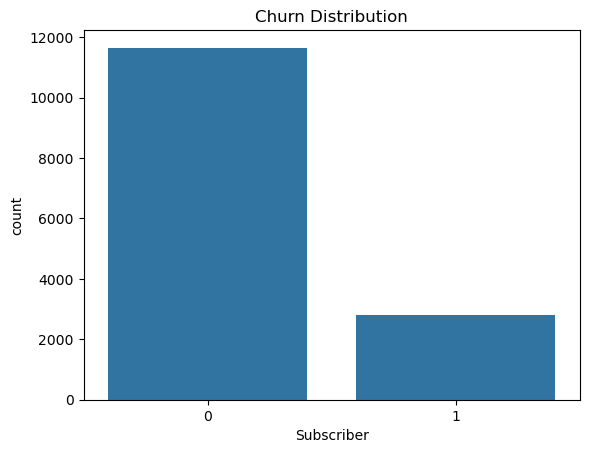

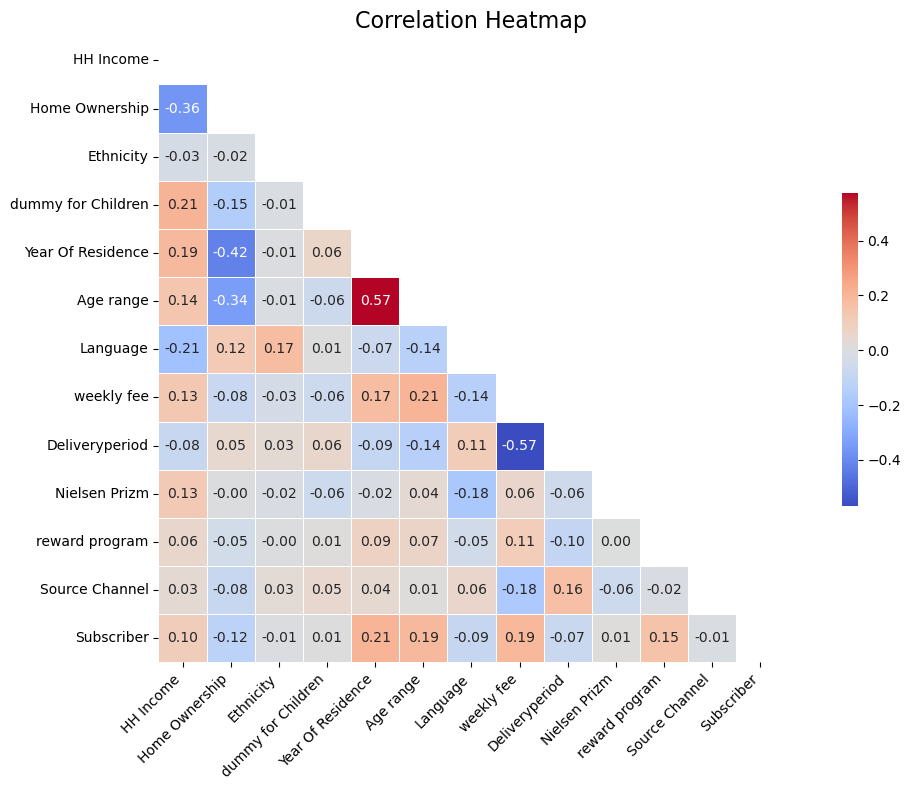

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(x='Subscriber', data=df)
plt.title("Churn Distribution")
plt.show()

# Heatmap
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Create mask for the upper triangle (optional, for cleaner look)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            linewidths=0.5, cbar_kws={"shrink": .5})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('Subscriber', axis=1)
y = df['Subscriber']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


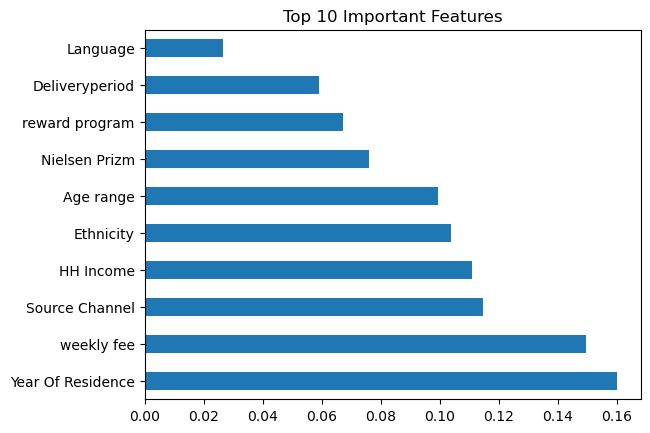

In [37]:
import seaborn as sns

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [38]:
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [39]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.2%}")
    print(classification_report(y_test, preds))


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 81.68%
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2323
           1       0.73      0.11      0.19       570

    accuracy                           0.82      2893
   macro avg       0.78      0.55      0.54      2893
weighted avg       0.80      0.82      0.76      2893


Random Forest Accuracy: 84.41%
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2323
           1       0.69      0.37      0.49       570

    accuracy                           0.84      2893
   macro avg       0.78      0.67      0.70      2893
weighted avg       0.83      0.84      0.82      2893


XGBoost Accuracy: 84.83%
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2323
           1       0.68      0.43      0.53       570

    accuracy                           0.85      2893
   macro avg       0.78      0.6

C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:12:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [41]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:12:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [45]:
best_model = xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

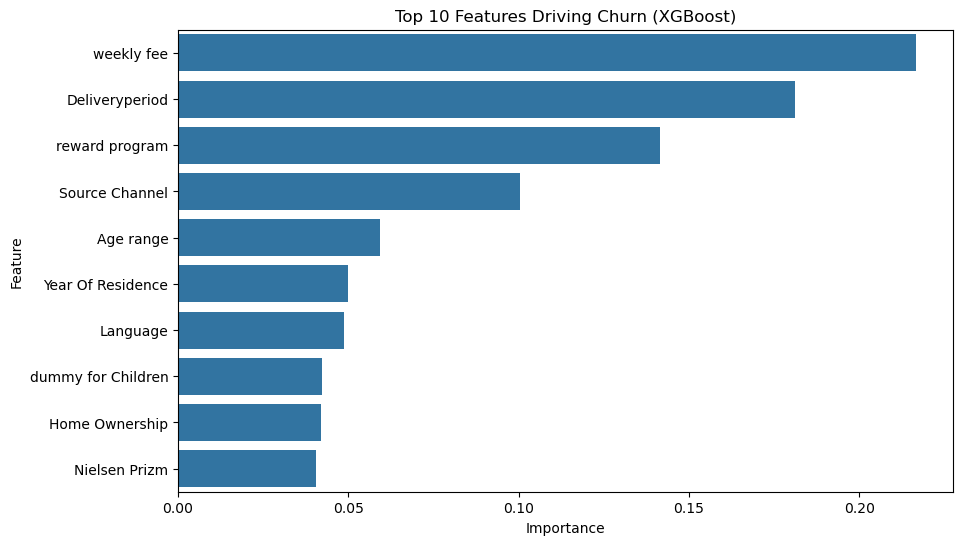

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Features Driving Churn (XGBoost)")
plt.show()
